In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
dados = pd.read_csv("../../Dados/UF_AnoMesAtend_ValorTotal.csv", encoding='ISO-8859-1', sep=';', skiprows = 3, skipfooter = 12,
                   thousands = '.', decimal = ',')
dados.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


### Selecionando os dados validos

In [3]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')

In [4]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.set_index('Unidade da Federação', inplace = True)
dados_usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,3.050109e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4.437116e+09


### Desafio parte I : Adicionando a coluna referente a região

In [5]:
# Definir um codigo para a regiao
cod_regiao = dados_usaveis.index.str.slice(start = 0, stop = 1)
# Criar um dicionario com os dados a serem inseridos
nome_regiao = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul' ,'5':'Centro-Oeste'}
# Criar a coluna a ser inserida
coluna_a_ser_inserida = cod_regiao.map(nome_regiao)
# Inserir a coluna no gráfico
dados_usaveis['Regiao'] = coluna_a_ser_inserida
dados_usaveis.head()

C:\Users\Kaiqu\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,3.050109e+08,Norte
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4.437116e+09,Norte


### Desafio parte II: Formatar o gráfico de custos por mês dos 5 estados

In [6]:
slice_por_gasto = dados_usaveis.sort_values('Total', ascending = False)

In [7]:
slice_por_gasto = slice_por_gasto.drop('Total',axis = 1)
slice_por_gasto = slice_por_gasto.drop('Regiao',axis = 1)
cinco_primeiros = slice_por_gasto.head()

In [8]:
# Importar seaborn para plotar o gráfico de linha
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('ticks')

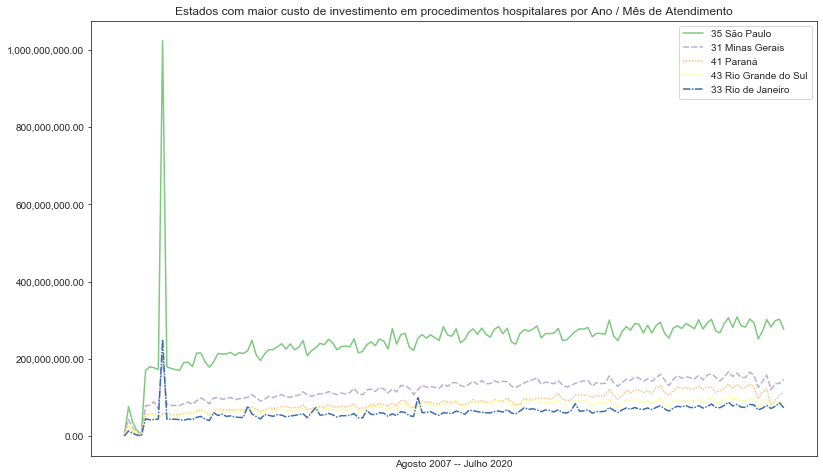

In [9]:
ax, figure = plt.subplots(figsize=(13,8))
ax = sns.lineplot(data = cinco_primeiros.T)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xticks([])
ax.set_xlabel('Agosto 2007 -- Julho 2020')
ax.set_title('Estados com maior custo de investimento em procedimentos hospitalares por Ano / Mês de Atendimento')
ax.legend(loc='best');

### Tratando outlier de São Paulo

In [10]:
interesse = cinco_primeiros.columns[6:]

### Plotando novamente

In [11]:
sem_outlier = cinco_primeiros[interesse].T

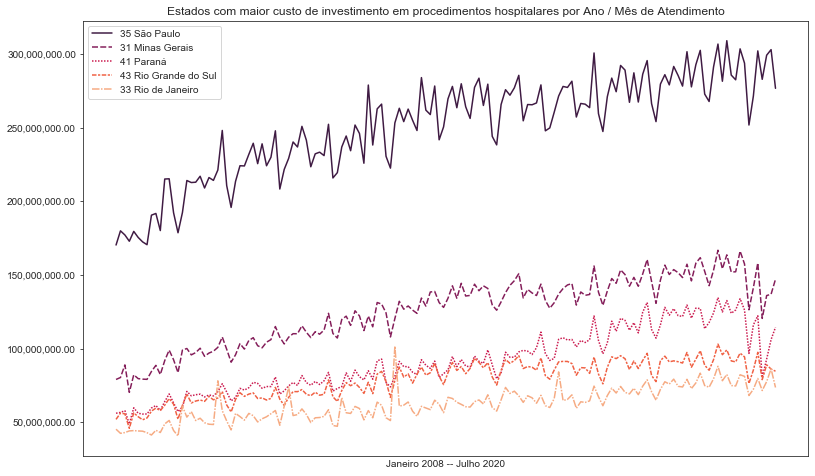

In [12]:
ax, figure = plt.subplots(figsize=(13,8))
ax = sns.lineplot(data = sem_outlier, palette = 'rocket')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xticks([])
ax.set_xlabel('Janeiro 2008 -- Julho 2020')
ax.set_title('Estados com maior custo de investimento em procedimentos hospitalares por Ano / Mês de Atendimento')
ax.legend(loc='best');

### Desafio parte III: Adicionar um estado da minha escolha a o gráfico

In [13]:
interesse = dados_usaveis.columns[6:]

In [14]:
outro_plot = dados_usaveis[interesse].sort_values('Total', ascending = False).iloc[:5]

In [15]:
estado_escolhido = dados_usaveis[interesse].loc['42 Santa Catarina']

In [16]:
plot_com_estado_escolhido = outro_plot.append(estado_escolhido)
# Dropando as colunas total e regiao
plot_com_estado_escolhido = plot_com_estado_escolhido.drop('Total', axis = 1)
plot_com_estado_escolhido = plot_com_estado_escolhido.drop('Regiao', axis = 1)

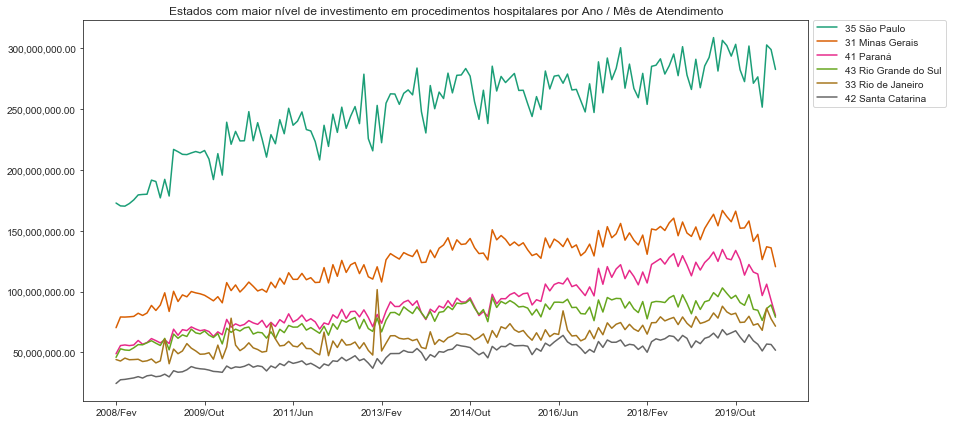

In [17]:
ax = plot_com_estado_escolhido.T.plot(figsize=(13,7), colormap = 'Dark2')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Estados com maior nível de investimento em procedimentos hospitalares por Ano / Mês de Atendimento')
ax.legend(loc='best', bbox_to_anchor=(1, 1.015));

### Desafio Parte IV: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas)

### Fonte: http://associacaopaulistamedicina.org.br/noticia/brasil-registra-mais-de-820-mil-casos-de-dengue-em-2020

Informação postada na data de: 19/06/2020 <br>
Os estados do Acre, São Paulo, Paraná, Mato Grosso do Sul, Mato Grosso, Goiás e Distrito Federal ganham destaque por apresentarem taxas de incidência de dengue acima da média dos demais locais ao redor do Brasil.<br>

A região Centro-Oeste segue liderando a maior incidência, com 997,6 casos a cada 100 mil habitantes. Em seguida, estão as regiões Sul (897,5 casos/100 mil habitantes), Sudeste (322,6 casos/100 mil habitantes), Nordeste (156,3 casos/100 mil habitantes) e Norte (96,7 casos/100 mil habitantes).

Como mencionado no artigo acima, as regiões de São Paulo e Paraná (ambos presentes nos gráficos), possuem pico em épocas de verão (ou épocas com em que o clima está mais quente). Há grandes chances de estes níveis de internação ocorrerem devido a casos de dengue e/ou derivados.

### Desafio Parte V: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

In [61]:
selecao = dados_usaveis['Regiao'] == 'Sudeste'
teste = dados_usaveis[selecao].sort_values('Total', ascending = False)

In [62]:
teste = teste.drop('Total', 1)
teste = teste.drop('Regiao', 1)

In [63]:
interesse = teste.columns[6:]
interesse = teste[interesse]

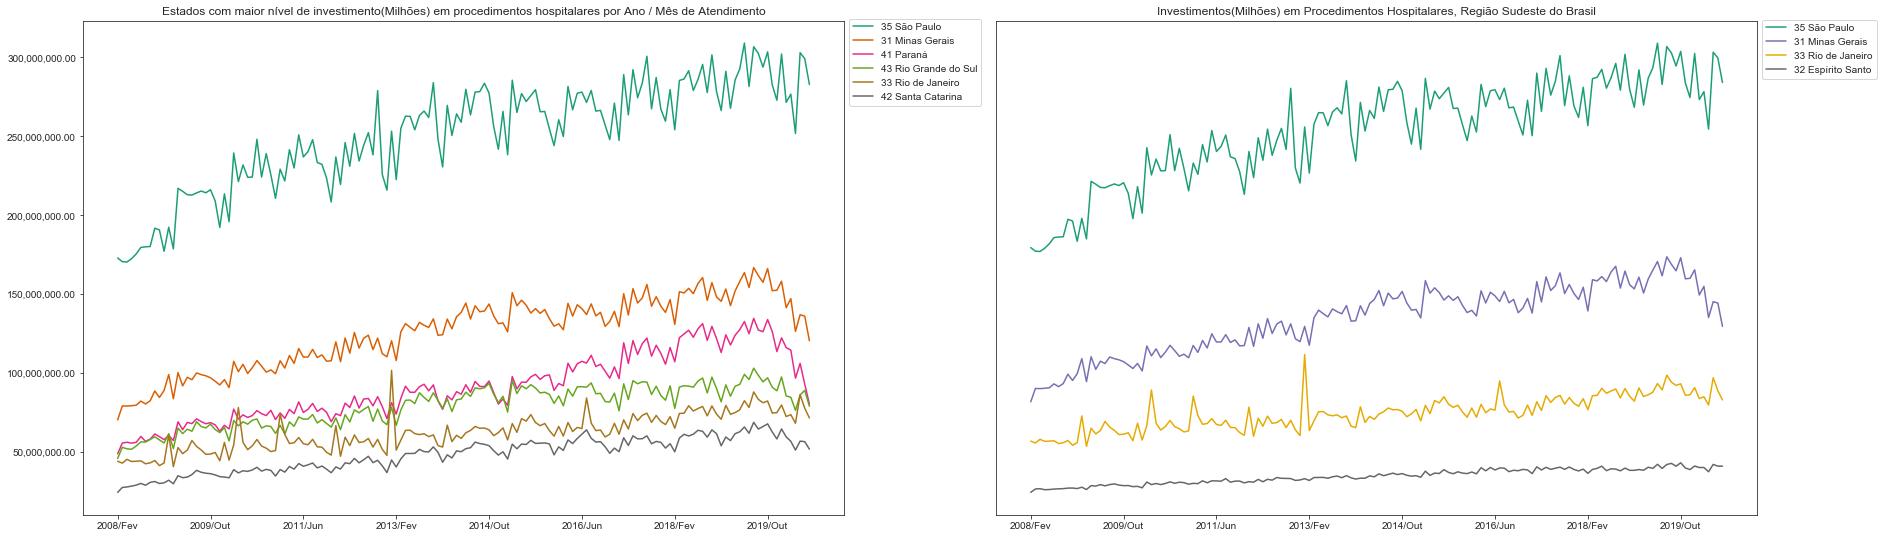

In [124]:
plt.figure(1, figsize=(30,20))
ax = plt.subplot(221)
ax = plot_com_estado_escolhido.T.plot(figsize=(30,20), colormap = 'Dark2', ax = ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_title('Estados com maior nível de investimento(Milhões) em procedimentos hospitalares por Ano / Mês de Atendimento')
ax.legend(loc='best', bbox_to_anchor=(1, 1.014))

ax = plt.subplot(222)
ax = interesse.T.plot(figsize=(30,20), colormap = 'Dark2', ax = ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_yticks([])
ax.set_title('Investimentos(Milhões) em Procedimentos Hospitalares, Região Sudeste do Brasil')
ax.legend(loc = 'best', bbox_to_anchor=(1, 1.012))
plt.show()

O comportamento nos estados Rio de Janeiro e São Paulo, aparentam ser os unicos da região sudeste que foram muito afetados neste mesmo período, Espirito Santo por exemplo não houve muita mudança nos gastos em procedimentos hospitalares, já Minas Gerais, apesar de não possuir muitos picos, houve um certo crescimento gradativo em seus investimentos, ficando um pouco semelhante a são paulo.